In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("train.csv")
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data = pd.read_csv("test.csv")
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
train_data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,1,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
572,0,3,Mr. George Patchett,0,19.0,0,0,14.5000
573,1,2,Miss. Ethel Garside,1,34.0,0,0,13.0000
574,1,1,Mrs. William Baird (Alice Munger) Silvey,1,39.0,1,0,55.9000
575,0,3,Mrs. Joseph (Maria Elias) Caram,1,18.0,1,0,14.4583


# Normalization

In [3]:
def z_score_normalization(x):
    mean = np.mean(x, axis=0)
    std_dev = np.std(x, axis=0)
    normalized_x = (x - mean) / std_dev
    return normalized_x

In [4]:
x_train = train_data.drop(['Survived', 'Name'], axis=1).values
x_train = z_score_normalization(x_train)

y_train = train_data['Survived'].values

In [5]:
x_test = test_data.drop(['Survived', 'Name'], axis=1).values
x_test = z_score_normalization(x_test)

y_test = test_data['Survived'].values

# Model

In [6]:
def f(x, w, b):
    val = 1 / (1 + np.exp(-np.dot(x, w) - b))
    thresholded_val = np.where(val < 0.5, 0, 1)
    return thresholded_val

# Cost Function

In [7]:
def j(x, y, w, b):
    m = len(y)
    y_hat = f(x, w, b)

    epsilon = 1e-15  # Small constant to avoid log(0) or log(1)
    clipped_y_hat = np.clip(y_hat, epsilon, 1 - epsilon)  # Clip y_hat to be within (epsilon, 1-epsilon)

    squared_error = (clipped_y_hat - y) ** 2
    return (-1/m) * np.sum(y * np.log(clipped_y_hat) + (1 - y) * np.log(1 - clipped_y_hat))


# Gradient Descent

In [8]:
def gradient_descent(x,y,w,b,alpha,epochs):
    m = len(y)
    costs = []
    for i in range(epochs):
        y_hat = f(x,w,b)
        error = y_hat -y
        
        temp_w = w - (alpha/m)*np.dot(error,x)
        temp_b = b - (alpha/m)*np.sum(error)
        
        w = temp_w
        b = temp_b

        cost = j(x,y,w,b)
        costs.append(cost)
        
        if i%100 == 0:
            print("Epoch: ",i)


    plt.plot(range(1, epochs+1),costs, marker='o',linestyle='-')
    plt.xlabel('Iteration')
    plt.ylabel('J(w,b)')
    plt.title('Learning Curve')
    return w,b

# Accuracy

In [9]:
def f1_score(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    if precision + recall == 0:
        return 0

    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

# Training

Epoch:  0
Epoch:  100
Epoch:  200
Epoch:  300
Epoch:  400
Epoch:  500
Epoch:  600
Epoch:  700
Epoch:  800
Epoch:  900
Training Accuracy =  0.7227272727272726


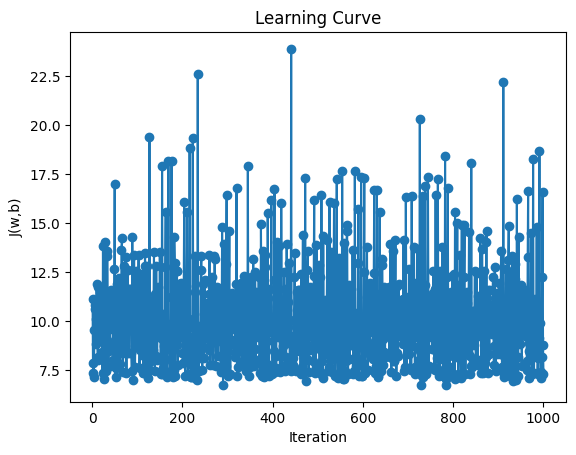

In [10]:
w = np.zeros(x_train.shape[1])
b = 0

alpha = 0.001
epochs = 1000

w,b = gradient_descent(x_train,y_train,w,b,alpha,epochs)

y_hat_train = f(x_train,w,b)
f1_train = f1_score(y_train, y_hat_train)
print("Training Accuracy = ",f1_train)

# Testing

In [11]:
y_hat_test = f(x_test,w,b)
f1_test = f1_score(y_test, y_hat_test)
print("Testing Accuracy = ",f1_test)

Testing Accuracy =  0.7019230769230769
